## Аналитическое решение

### Исходные данные

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [2]:
delta = 110 * 10 ** -3 
alpha = 3000
t0 = 293
lamda = 419
c = 234
rho = 10500
tf = 300
tau1, tau2 = 200, 300

### Определение безразмерных параметров

In [3]:
a = lamda/c/rho
print('a =', a)
Bi = delta*alpha/lamda
print('Bi =', Bi)
Fo=a/delta**2
print('Fo =', Fo)
X=1/delta
print('X =', X) 
Theta_0=t0-tf
print('Theta_0 =', Theta_0) 

a = 0.00017053317053317054
Bi = 0.7875894988066826
Fo = 0.014093650457286822
X = 9.090909090909092
Theta_0 = -7


### Орпеделение $\epsilon$ и других параметров решения из транцендентного уравнения
$tan(\epsilon)=Bi/\epsilon$   
$A_i=\dfrac{2sin(\epsilon)}{\epsilon+sin(\epsilon)cos(\epsilon)}$

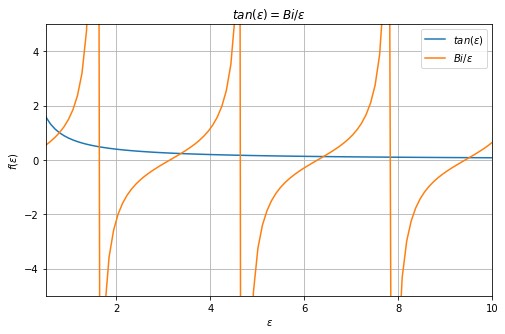

In [4]:
%matplotlib inline
y1 = lambda e: Bi/e
y2 = lambda e: np.tan(e)
e_ar = np.linspace(0.5,10,100)

plt.rcParams["figure.figsize"] = (8, 5)
plt.plot(e_ar, y1(e_ar),label = r'$ tan(\epsilon)$')
plt.plot(e_ar, y2(e_ar), label = r'$Bi/\epsilon$')
plt.legend()
plt.title(r'$ tan(\epsilon)=Bi/\epsilon $')
plt.ylabel(r'$f(\epsilon)$')
plt.xlabel(r'$\epsilon$')
plt.ylim(-5,5)
plt.xlim(0.5,10)
plt.grid()
plt.show()


In [5]:
def e_solve(e):
    return y2(e)-y1(e)
e0 = 0.5
N = 1000
A=np.zeros(N)
eps=np.zeros(N)

for i in range(N):
    eps[i] = fsolve(e_solve,e0+i*np.pi)
    A[i]=2*np.sin(eps[i])/(eps[i]+np.sin(eps[i])*np.cos(eps[i]))


### Представление решения в виде суммы ряда
$\Theta(x,t)=\sum_{i=0}^N{A_i*cos(\epsilon_i x X)exp(-\epsilon_i^2 Fo \cdot t)}$   
$T(x,t)=\Theta(x,t)*\Theta_0 - t_f $

In [6]:
def Theta(x,t):
    sum=0
    for i in range(N):
        sum = sum + A[i]*np.cos(eps[i]*x*X)*np.exp(-eps[i]**2*Fo*t)
    sum = sum*Theta_0+tf
    return sum


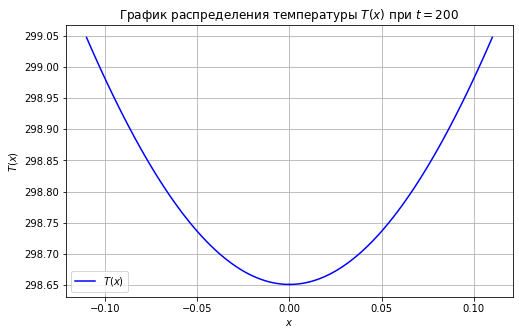

In [7]:
%matplotlib inline
x_ar = np.linspace(0,delta,50)

plt.rcParams["figure.figsize"] = (8, 5)
plt.plot(x_ar, Theta(x_ar,tau1),label = r'$ T(x)$',color = 'b')
plt.plot(-x_ar, Theta(x_ar,tau1),color = 'b')
plt.legend()
plt.title(f'График распределения температуры $T(x)$ при $t= {tau1}$')
plt.ylabel(r'$T(x)$')
plt.xlabel(r'$x$')
plt.grid()
plt.show()

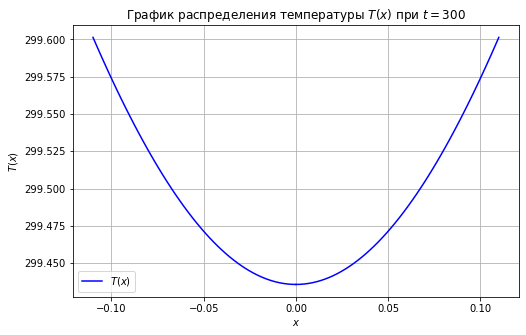

In [8]:
%matplotlib inline

plt.rcParams["figure.figsize"] = (8, 5)
plt.plot(x_ar, Theta(x_ar,tau2),label = r'$ T(x)$',color = 'b')
plt.plot(-x_ar, Theta(x_ar,tau2),color = 'b')
plt.legend()
plt.title(f'График распределения температуры $T(x)$ при $t = {tau2}$')
plt.ylabel(r'$T(x)$')
plt.xlabel(r'$x$')
plt.grid()
plt.show()

###  Проверка граничного условия
$\alpha(T(\delta,t)-t_f)=-\lambda\dfrac{\partial T(\deltaбе)}{\partial x}$

In [9]:
def der(f,x,t):
    h = 0.00000001
    return (f(x+h,t)-f(x,t))/h

In [17]:
def error(tau):
    return abs(alpha*(Theta(delta,tau)-tf)+lamda*der(Theta,delta,tau))

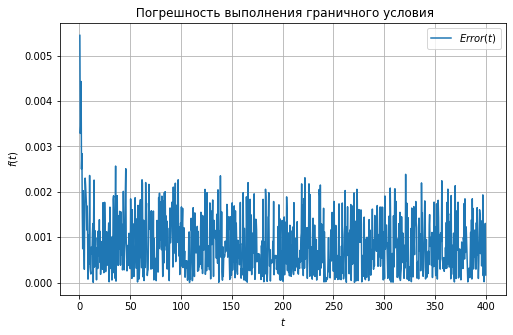

In [18]:
t_ar = np.linspace(0.5, 400, 1000)
plt.rcParams["figure.figsize"] = (8, 5)
plt.plot(t_ar, error(t_ar),label = r'$ Error(t)$')
plt.legend()
plt.title(r' Погрешность выполнения граничного условия')
plt.ylabel(r'$f(t)$')
plt.xlabel(r'$t$')
plt.grid()
plt.show()

$ Error(t) \ll 1  \Rightarrow $ Решение найдено верно   
 Полученное распеределение температуры с допустимой точностью совпадет с найденным в численном пакете ANSYS